## Ajuste the hiper-parámetros

Si quisieramos hacer un escalado de datos y despues establacer el procedimieto de entrenamiento con K-FOld, y despues una prediccion?

Como lo hascemos si el K-Fol dya me seteado y me parte el dataset en TEST y TRAINING

Si no lo hacemos de manera manual con bucles for es imposible.

Esto lo lograremos con los **Flujos de trabajo**

No Es bueno dejar los parametros por defecto. Es mejor customizarlos a nuestra necsidades.

EL objetivo principal es cononcer los motivos por los que es encesario llevar un proceso de ajuste de parametros en un modelo supervisado.

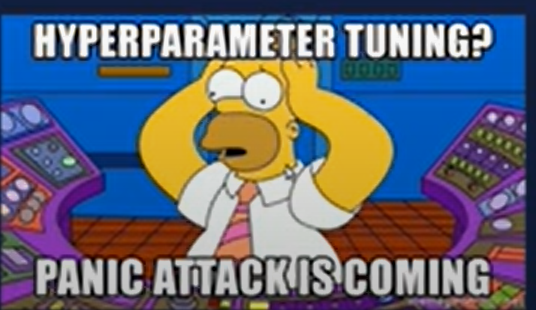

In [1]:
from IPython.display import Image
Image(filename='img/1.PNG')

DIgamos que tenemos 3 hiper parametros.

El espacio de busqueda es N dimensional , porque la N es el numero de hiper-parametros a definir.

En cada uno de los ejes tenemos los distintos valro que puede tomar ese hiper paramtro.

Y en cada uno de los puntos vamos a tener el **rendimiento**



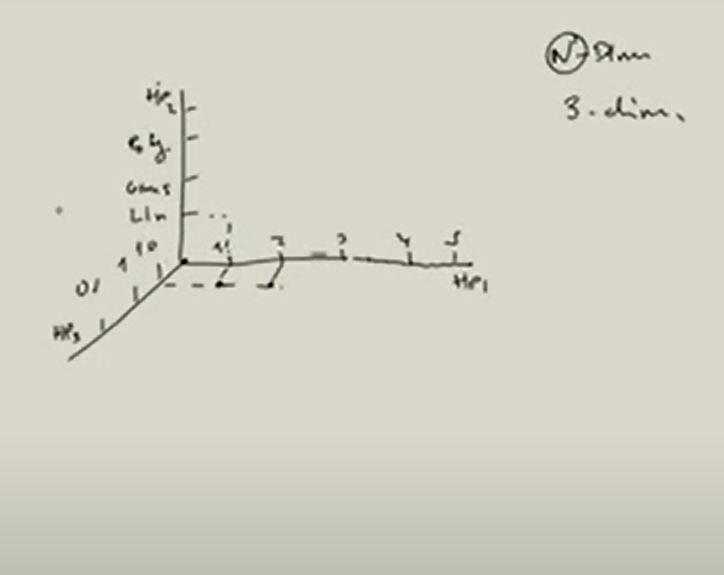

In [2]:
from IPython.display import Image
Image(filename='img/2.PNG')

Dentro de este volumen geometrico tendremos todos los hiper parametros.

El objetivo es encontrar el vector de hiper parametros que maximiza el rendimiento del modelo.

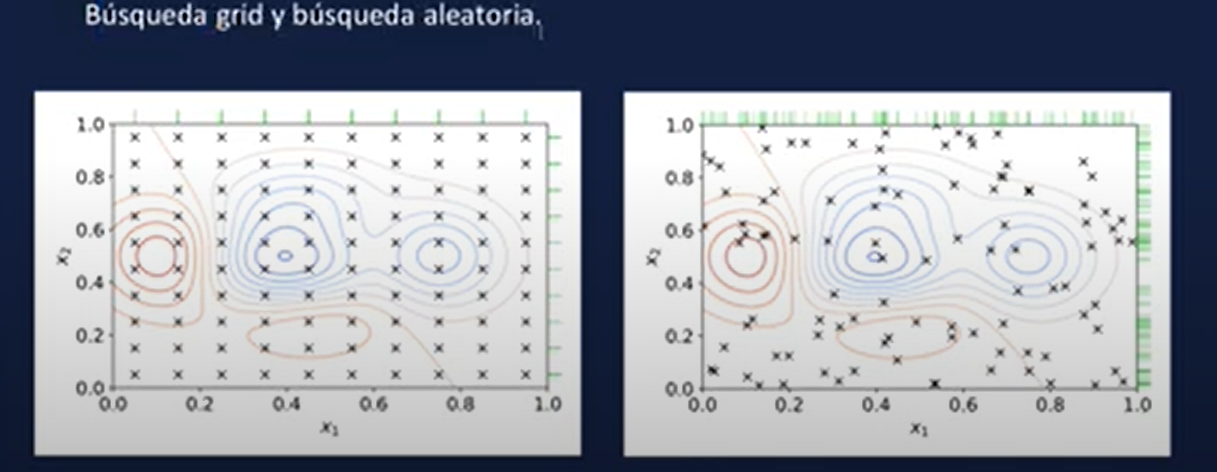

In [3]:
from IPython.display import Image
Image(filename='img/3.PNG')

Tengo que validar los hiper parametros con el conjunto de train.

Pero dentro de train tengo que reservar un subconjunto para validara los hiper parametros

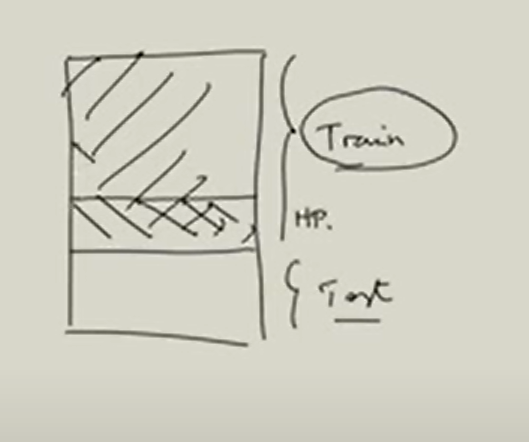

In [16]:
from IPython.display import Image
Image(filename='img/4.PNG')

Entonces pruebo hacer el trainig con la parte de arriba y pruebo los hiper parametros con los datos reservados.

Pero ese subconjunto se llama canjunto de **validacion**

Pero el rendimiento del modelo lo obtengo cuando le paso el **test** y me da el ACC por ejemplo.

Entonces el rendimiento predictivo lo obtengo unicamente utilziando los patrones de test


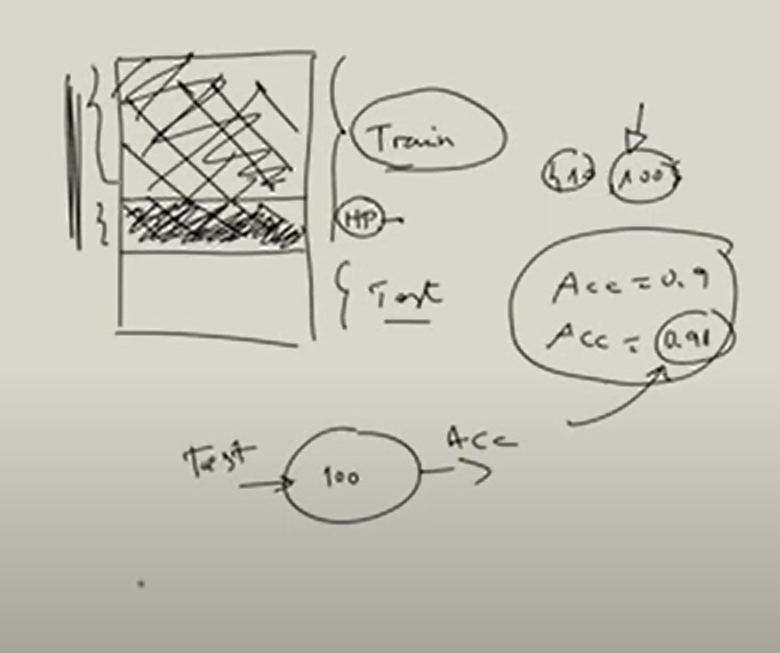

In [17]:
from IPython.display import Image
Image(filename='img/5.PNG')

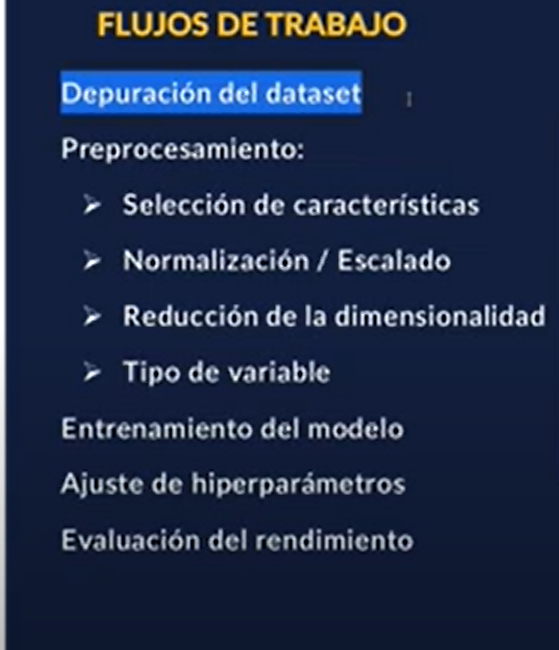

In [18]:
from IPython.display import Image
Image(filename='img/6.PNG')

## GRIG

In [4]:
from pandas import read_csv 
from sklearn.svm import SVC 
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.model_selection import GridSearchCV 
from random import seed  
from time import time  
seed= seed(time()) 




In [5]:
filename = 'Seed_Data.csv'  
data = read_csv(filename) 

data.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [6]:
X = data[data.columns[:-1]] 
Y = data[data.columns[-1]] 

Aqui tenemos que definir el modelo de clasificacion

Lo primero es definiré el modelo de clasificacion cruzada

Entonces voy a utilizar unca clase que tambiene sta incluida dentro de model_selection. **RepeatedStratifiedKFold**

LO que hace es repetir un KFold 10 3 veces, es decir un total de 30

Como es un problema de clasificacón le digo que es una selección estrateficadas.

Que me asegure que el cada uno de los FOLD tienen un equilibrio de calse igual que el datset original.

- Esto es muy importante




In [7]:
model = SVC() 
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3 ) 

Ahora definimos el espacio en donde queremos que cada un o de los hiper parametros busque

Defimnimos el espacio de busqueda

En este ejemplo estamos hablando de un SVC

Realizamos una lista de diccionario 

Cada dict va a contener la palabra clave y dentro una lista con los distintos valores que puede tomar ese hiper parametro.


In [8]:
space =  [{'kernel':['poly', 'sigmoid', 'rbf'],
           'C' :[1e-3, 0.1, 1, 1e1, 1e2, 1e4],
           'class_weight': [None,'balanced'],
           'gamma': ['auto', 'scale']},
          {'kernel':['linear'],
           'C' :[1e-3, 0.1, 1, 1e1, 1e2, 1e4],
           'class_weight': [None,'balanced'],
          }           
         ] 

Ahora definimos un objeto y aqui indico el modelo que defini arriba

Indico el espacio de busqueda (grid)

Indico la metrica a optimizar



In [9]:
search = GridSearchCV(model,
                      param_grid=space,
                      scoring='balanced_accuracy',
                      n_jobs=-1,
                      cv=cv) 

Por ultimo invoco al metodo fit y me realiza todo el procedimiento que previamente he definido.

In [10]:
result = search.fit(X, Y)

In [12]:
print(result.best_score_)

0.9698412698412698


In [15]:
print(result.best_params_)

{'C': 10000.0, 'class_weight': None, 'kernel': 'linear'}


In [23]:
from pandas import read_csv 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.model_selection import RandomizedSearchCV 
from random import seed  
from time import time 
from scipy.stats import loguniform, randint  

seed= seed(time()) 

filename = 'Seed_Data.csv' 

data = read_csv(filename)  

X = data[data.columns[:-1]] 
Y = data[data.columns[-1]]  

model = DecisionTreeClassifier() 

cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3 )  

searchSpace =  [{'criterion':['entropy'],             
                 'max_depth' :randint(3,30),            
                 'class_weight': [None,'balanced'],            
                 'ccp_alpha':  loguniform(1e-5, 100) }           
               ] 

search = RandomizedSearchCV(model,                              
                            param_distributions=searchSpace,                              
                            scoring='balanced_accuracy',                              
                            n_jobs=-1,                               
                            cv=cv,                              
                            n_iter=500) 
result = search.fit(X, Y)

print(result)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
                   estimator=DecisionTreeClassifier(), n_iter=500, n_jobs=-1,
                   param_distributions=[{'ccp_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000191BAB76AF0>,
                                         'class_weight': [None, 'balanced'],
                                         'criterion': ['entropy'],
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000191BA1C5340>}],
                   scoring='balanced_accuracy')
